# Airbnb Listing Analysis

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("Listings.csv", encoding = 'ISO-8859-1', low_memory = False)

In [19]:
df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [43]:
df['host_since'] = pd.to_datetime(df['host_since'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [47]:
# Filter the data down to hosts that are in Paris
# Keeping only columns host_since, neighbourhood, city, accommodates, price
paris_df = df.query("city == 'Paris'").loc[:,['host_since','neighbourhood','city','accommodates','price']]
paris_df.info()
paris_df

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [49]:
# Check for missing values in the Paris listings
paris_df.isna().sum() #sum the number of null values


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [51]:
paris_df.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [55]:
# Checking for the number of host that has the price = 0
paris_df.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [67]:
paris_neighborhood = (
paris_df
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price')
)    
paris_neighborhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [81]:
paris_accom = (
    paris_df
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price': 'mean'})
    .sort_values('price')
)

paris_accom.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [87]:
paris_over_time = (
    paris_df
    .set_index('host_since')
    .resample('YE')
    .agg({
        'neighbourhood': 'count',
        'price':'mean'
    })
)
paris_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


In [105]:
# Plotting the data
import matplotlib.pyplot as plt
import seaborn as sns

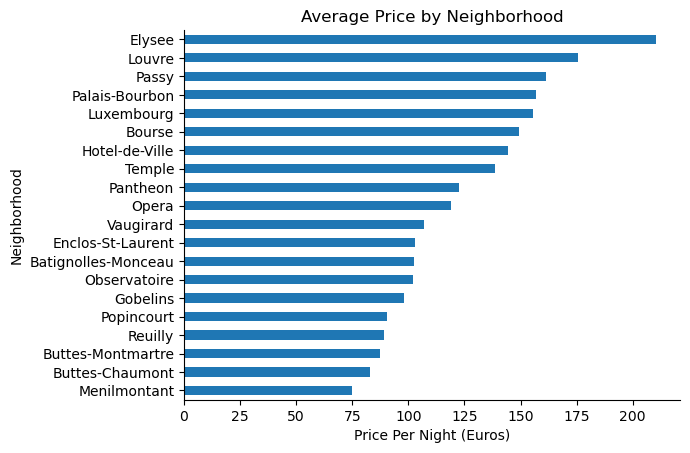

In [117]:
# Average Price by Neighborhood

(paris_neighborhood
    .plot(kind = 'barh', 
          stacked = True, 
          title = 'Average Price by Neighborhood',
          xlabel = 'Price Per Night (Euros)',
          ylabel = 'Neighborhood',
          legend = None
         )  # stacked to make stacked bar chart
    
)

sns.despine()

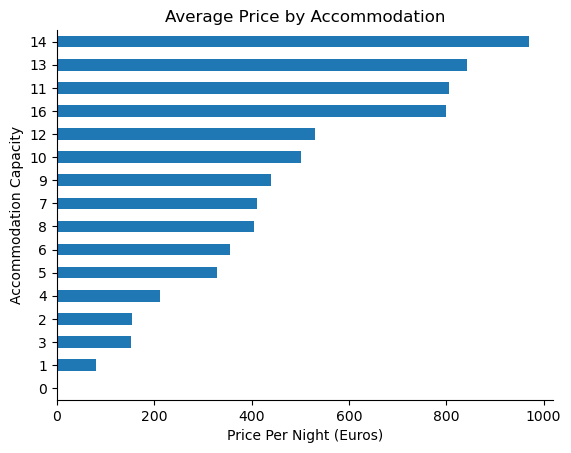

In [125]:
# Average Price by Accommodation Capacity

(paris_accom
 .plot(
    kind = 'barh', 
    stacked = True, 
    title = 'Average Price by Accommodation',
    xlabel = 'Price Per Night (Euros)',
    ylabel = 'Accommodation Capacity',
    legend = None
 )  # stacked to make stacked bar chart

)
sns.despine()

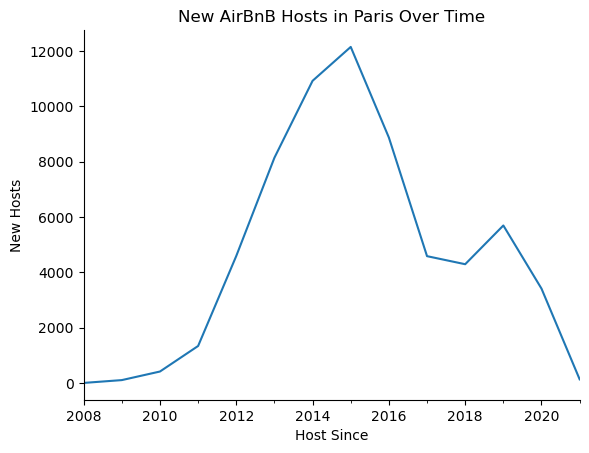

In [145]:
# Number of hosts over time

paris_over_time['neighbourhood'].plot(
    xlabel = 'Host Since',
    ylabel = 'New Hosts',
    title = 'New AirBnB Hosts in Paris Over Time'
)

sns.despine()

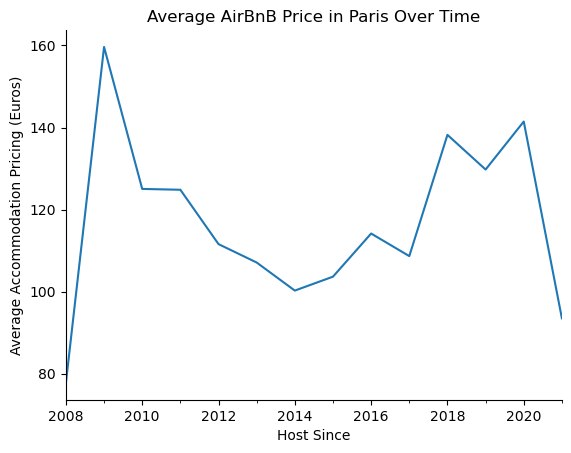

In [143]:
# Average Accommodation Price over Time

paris_over_time['price'].plot(
    xlabel = 'Host Since',
    ylabel = 'Average Accommodation Pricing (Euros)',
    title = 'Average AirBnB Price in Paris Over Time'
)

sns.despine()

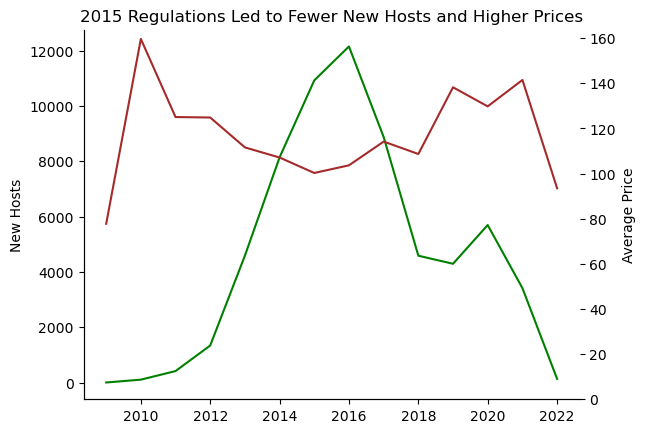

In [167]:
fig, ax = plt.subplots()

ax.plot(
    paris_over_time.index,
    paris_over_time['neighbourhood'],
    label = 'New Hosts',
    c = 'green',
)

ax.set_ylabel('New Hosts')

ax2 = ax.twinx()

ax2.plot(
    paris_over_time.index,
    paris_over_time['price'],
    label = 'Average Price',
    c = 'brown',
)
ax2.set_ylim(0)
ax2.set_ylabel('Average Price')

ax.set_title('2015 Regulations Led to Fewer New Hosts and Higher Prices')

sns.despine()
